[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/scottlevie97/python_FVM_CSM/blob/newBoundaryConditions/seperate_notebooks/_08_Post-Processing.ipynb)

In [23]:
from ipynb.fs.full._05_Fixed_Traction_BCs import *

In [24]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["grid.linestyle"] = "-" 
plt.rcParams["grid.color"] =  "grey"
plt.rcParams["grid.linewidth"] = 0.2
plt.rcParams["axes.grid"] = True

# 8. **Post-Processing**
---


Now that we have a solution displacement field, we need to determine the validity of these results. We will look at three post-processing criteria for the cantilever beam test case. These are:

- Deflection of the beam tip
- Strain field
- Stress field

The beam deflection is probably the most useful as it can be compared to an analytical solution.

Before proceeding with post-processing we need to calculate the displacement values on the boundaries via extrapolation, as done in <code>boundaryCellTraction</code>: 

## Boundary Displacements

Firstly we need to load the solution displacement field.

In [25]:
import numpy as np
path = open('./Solution/0/U.csv')
U = np.loadtxt(path, delimiter=",")

For each boundary, we assign displacements to the boundary faces. If the boundary condition is fixed displacement, this value is assigned. If the boundary condition is fixed traction, a linear extrapolation is used:

In [26]:
def addBoundaryDisplacements(U_field):

    # Add boundaries to displacement fields:
    U_with_boundaries = np.zeros((ny+2, nx+2)) 
    U_reshape = U_field[:, 0].reshape(ny, nx)
    U_reshape = np.flip(U_reshape, 0)
    U_with_boundaries[1:ny+1, 1:nx +1] =  U_reshape

    V_with_boundaries = np.zeros((ny+2, nx+2)) 
    V_reshape = U_field[:, 1].reshape(ny, nx)
    V_reshape = np.flip(V_reshape, 0)
    V_with_boundaries[1:ny+1, 1:nx +1] =  V_reshape

    linearExtrapolate = boundaryCellTraction.linearExtrapolate

    #### Traction ####

    # Bottom boundary:
    if BC_settings("b").traction:

        for i in np.arange(1, nx + 1):
            ycoord = ny+1
            U_with_boundaries[ycoord, i] = linearExtrapolate(U_with_boundaries[(ycoord-1), i], U_with_boundaries[(ycoord-2), i])
            V_with_boundaries[ycoord, i] = linearExtrapolate(V_with_boundaries[(ycoord-1), i], V_with_boundaries[(ycoord-2), i])

    # Top boundary:
    if BC_settings("t").traction:

        for i in np.arange(1, nx + 1):
            ycoord = 0
            U_with_boundaries[ycoord, i] = linearExtrapolate(U_with_boundaries[(ycoord+1), i], U_with_boundaries[(ycoord+2), i])
            V_with_boundaries[ycoord, i] = linearExtrapolate(V_with_boundaries[(ycoord+1), i], V_with_boundaries[(ycoord+2), i])


    # Right boundary:
    if BC_settings("r").traction:

        for i in np.arange(1, ny + 1):
            xcoord = nx+1
            U_with_boundaries[i, xcoord] = linearExtrapolate(U_with_boundaries[i, (xcoord-1)], U_with_boundaries[i, (xcoord-2)]) 
            V_with_boundaries[i, xcoord] = linearExtrapolate(V_with_boundaries[i, (xcoord-1)], V_with_boundaries[i, (xcoord-2)]) 

    # Left boundary:
    if BC_settings("l").traction:

        for i in np.arange(1, ny + 1):
            xcoord = 0
            U_with_boundaries[i, xcoord] = linearExtrapolate(U_with_boundaries[i, (xcoord+1)], U_with_boundaries[i, (xcoord+2)])
            V_with_boundaries[i, xcoord] = linearExtrapolate(V_with_boundaries[i, (xcoord+1)], V_with_boundaries[i, (xcoord+2)])

    ##### Fixed Displacement ####

    # Bottom boundary:
    if BC_settings("b").fixed_displacement:

        for i in np.arange(1, nx + 1):
            ycoord = ny+1
            U_with_boundaries[ycoord, i] = boundary_U("b", "x").BC
            V_with_boundaries[ycoord, i] = boundary_U("b", "y").BC

    # Top boundary:
    if BC_settings("t").fixed_displacement:

        for i in np.arange(1, nx + 1):
            ycoord = 0
            U_with_boundaries[ycoord, i] = boundary_U("t", "x").BC
            V_with_boundaries[ycoord, i] = boundary_U("t", "y").BC


    # Right boundary:
    if BC_settings("r").fixed_displacement:

        for i in np.arange(1, ny + 1):
            xcoord = nx+1
            U_with_boundaries[i, xcoord] = boundary_U("r", "x").BC
            V_with_boundaries[i, xcoord] =  boundary_U("r", "y").BC

    # Left boundary:
    if BC_settings("l").fixed_displacement:

        for i in np.arange(1, ny + 1):
            xcoord = 0
            U_with_boundaries[i, xcoord] = boundary_U("l", "x").BC
            V_with_boundaries[i, xcoord] = boundary_U("l", "y").BC

    # Corners:

    # Bottom Left:
    xcoord = 0
    ycoord = ny+1
    U_with_boundaries[ycoord, xcoord] = linearExtrapolate(U_with_boundaries[ycoord -1, xcoord +1], U_with_boundaries[ycoord -2, xcoord +2]) 
    V_with_boundaries[ycoord, xcoord] = linearExtrapolate(V_with_boundaries[ycoord -1, xcoord +1], V_with_boundaries[ycoord -2, xcoord +2]) 

    # Bottom Right:
    xcoord = nx+1
    ycoord = ny+1
    U_with_boundaries[ycoord, xcoord] = linearExtrapolate(U_with_boundaries[ycoord -1, xcoord -1], U_with_boundaries[ycoord -2, xcoord -2]) 
    V_with_boundaries[ycoord, xcoord] = linearExtrapolate(V_with_boundaries[ycoord -1, xcoord -1], V_with_boundaries[ycoord -2, xcoord -2]) 

    # Top Left:
    xcoord = 0
    ycoord = 0
    U_with_boundaries[ycoord, xcoord] = linearExtrapolate(U_with_boundaries[ycoord +1, xcoord +1], U_with_boundaries[ycoord +2, xcoord +2]) 
    V_with_boundaries[ycoord, xcoord] = linearExtrapolate(V_with_boundaries[ycoord +1, xcoord +1], V_with_boundaries[ycoord +2, xcoord +2]) 

    # Top Right:
    xcoord = nx+1
    ycoord = 0
    U_with_boundaries[ycoord, xcoord] = linearExtrapolate(U_with_boundaries[ycoord +1, xcoord -1], U_with_boundaries[ycoord +2, xcoord -2]) 
    V_with_boundaries[ycoord, xcoord] = linearExtrapolate(V_with_boundaries[ycoord +1, xcoord -1], V_with_boundaries[ycoord +2, xcoord -2]) 

    return U_with_boundaries, V_with_boundaries

Applying <code>addBoundaryDisplacements</code> to U field:

In [27]:
u_with_boundaries, v_with_boundaries = addBoundaryDisplacements(U)

## Tip Deflection

The analytical solution for the the deflection $d$ of a slender cantilever beam is given by:

$$ d = \frac{PL^3}{3(\frac{E}{1-v^2})I} $$

Where $P = 0.1 $ MN is the applied load, $L = 2$ m is the length of the beam, and $ I = \frac{bh^3}{12} = \frac{0.1^3}{12}$ is the second moment of area of the beam about its bending axis.

$$ d = \cfrac{(-1\mathrm{e}{10}^6)(2)}{3 \left( \cfrac{200\mathrm{e}^9}{1-0.3^2} \right) \cfrac{0.1^3}{12}} = 0.01456 m$$


The deflection $d$ above is equivalent to the value of "v" at the tip of the beam. So, lets plot the deflection in the y-direction ($v$) as a function of x.


In [28]:
# Initilise displacement vectors
x_displacement_vector = np.zeros(nx+2)
y_displacement_vector = np.zeros(ny+2)

# First value is equal to 0
x_displacement_vector[0] = 0
y_displacement_vector[0] = 0

# Last value is equal to Lx
x_displacement_vector[nx+1] = Lx
y_displacement_vector[ny+1] = Ly

# Cell centre values
x_displacement_vector[1:nx+1] = np.arange((Lx/nx)/2, Lx , Lx/nx)
y_displacement_vector[1:ny+1] = np.arange((Ly/ny)/2, Ly , Ly/ny)

In [29]:
# y-Deflection for y = 0
y_deflection = v_with_boundaries[0,:]

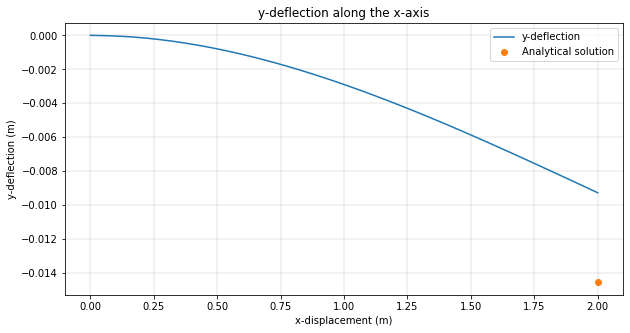

In [30]:
from matplotlib import pyplot as plt

plt.plot(x_displacement_vector, y_deflection,  label="y-deflection")
plt.scatter(2, -0.01456, label = "Analytical solution", color = "C1")
plt.xlabel("x-displacement (m)")
plt.ylabel("y-deflection (m)")
plt.title("y-deflection along the x-axis")
plt.legend()

## Strain field

Strain field $\epsilon$:

$$
\epsilon
=
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right) \\ \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right) & \dfrac{\delta v }{\delta y}
\end{bmatrix}
$$

$$\epsilon _{xx} = \frac{du}{dx}$$
$$\epsilon _{yy} = \frac{dv}{dy}$$

$$\epsilon _{xy} = \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right)$$



## Stress field

Stress field $\sigma$:

$$
\boldsymbol{\sigma}
=
\begin{bmatrix}
\sigma_{xx}
&
\sigma_{xy}
\\
\sigma_{xy}
&
\sigma_{yy}
\end{bmatrix}
=
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
&
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}
$$


Both strain and stress fields require linear combinations of the following partial displacement fields:  

$$ \frac{du}{dx}, \frac{dv}{dy}, \frac{du}{dy}, \frac{dv}{dx} $$


$$ \frac{du}{dx}, \frac{dv}{dy}, \frac{du}{dy}, \frac{dv}{dx} $$

In [31]:
class partialDisplacement():

    def __init__(self, u_with_boundaries, v_with_boundaries, nx, ny, dx, dy):

        ##### du/dx ####    
        
        # Initialise field
        dudx =  np.zeros([ny, nx])

        # j is y index
        for j in np.arange(0, np.size(dudx, 0)):
            # i is x index
            for i in np.arange(0, np.size(dudx, 1)):

                if (i == 0) | (i == np.size(dudx, 1) - 1):
                    denom = 1.5*dx
                else:
                    denom = 2*dx

                dudx[j, i] = (u_with_boundaries[j+1, i+2] - u_with_boundaries[j+1, i])/denom 

        self.dudx = dudx  

        ##### dv/dy ####

        # Initialise field
        dvdy = np.zeros([ny, nx])

        # j is y index
        for j in np.arange(0, np.size(dvdy, 0)):
            # i is x index
            for i in np.arange(0, np.size(dvdy, 1)):

                if (j == 0) | (j == np.size(dvdy, 0) - 1):
                    denom = 1.5*dy
                else:
                    denom = 2*dy

                dvdy[j, i] = (v_with_boundaries[j, i+1] - v_with_boundaries[j+2, i+1])/denom   

        self.dvdy = dvdy  
        
        ##### dv/dx ####   
        
        # Initialise field
        dvdx =  np.zeros([ny, nx])

        # j is y index
        for j in np.arange(0, np.size(dudx, 0)):
            # i is x index
            for i in np.arange(0, np.size(dvdx, 1)):

                if (i == 0) | (i == np.size(dvdx, 1) - 1):
                    denom = 1.5*dx
                else:
                    denom = 2*dx

                dvdx[j, i] = (v_with_boundaries[j+1, i+2] - v_with_boundaries[j+1, i])/denom 
        
        self.dvdx = dvdx  

        ##### du/dy ####

        # Initialise field
        dudy = np.zeros([ny, nx])

        # j is y index
        for j in np.arange(0, np.size(dudy, 0)):
            # i is x index
            for i in np.arange(0, np.size(dudy, 1)):

                if (j == 0) | (j == np.size(dudy, 0) - 1):
                    denom = 1.5*dy
                else:
                    denom = 2*dy

                dudy[j, i] = (u_with_boundaries[j, i+1] - u_with_boundaries[j+2, i+1])/denom    

        self.dudy = dudy 

In [32]:
dudx = partialDisplacement(u_with_boundaries, v_with_boundaries, nx, ny, dx, dy).dudx
dvdy = partialDisplacement(u_with_boundaries, v_with_boundaries, nx, ny, dx, dy).dvdy
dvdx = partialDisplacement(u_with_boundaries, v_with_boundaries, nx, ny, dx, dy).dvdx
dudy = partialDisplacement(u_with_boundaries, v_with_boundaries, nx, ny, dx, dy).dudy

## Display Strain Field 

$$\epsilon _{xx} = \frac{du}{dx}$$
$$\epsilon _{yy} = \frac{dv}{dy}$$
$$\epsilon _{xy} = \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right)$$

In [33]:
epsilon_xx = dudx
epsilon_yy = dvdy
epsilon_xy = (1/2)*(dvdx + dudy)

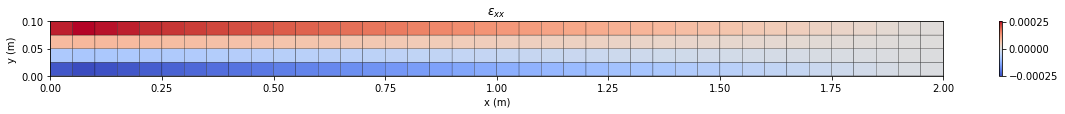

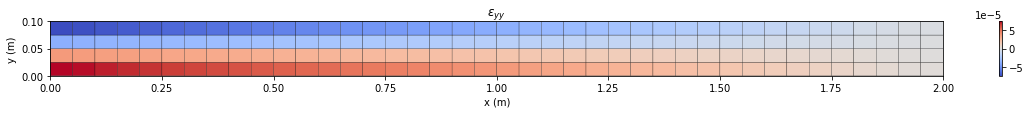

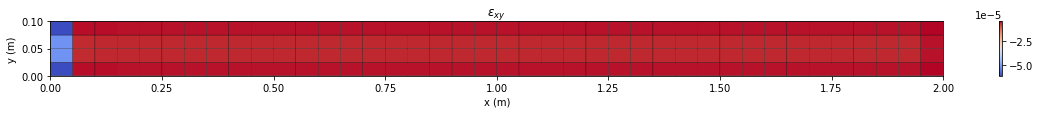

In [34]:
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (Lx*10, Ly*10)

dispx, dispy = np.meshgrid(x_displacement_vector, y_displacement_vector)
dispx_cell = dispx[1:ny+1, 1:nx+1]
dispy_cell = dispy[1:ny+1, 1:nx+1]


plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.pcolor(dispx_cell, dispy_cell, np.flip(epsilon_xx, 0), edgecolors = "k", cmap='coolwarm')
plt.title("$\epsilon _{xx}$")
plt.colorbar()
plt.show()

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.pcolor(dispx_cell, dispy_cell, np.flip(epsilon_yy, 0), edgecolors = "k", cmap='coolwarm')
plt.title("$\epsilon _{yy}$")
plt.colorbar()
plt.show()

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.pcolor(dispx_cell, dispy_cell, np.flip(epsilon_xy, 0), edgecolors = "k", cmap='coolwarm')
plt.title("$\epsilon _{xy}$")
plt.colorbar()
plt.show()


## Display Stress Fields


$$
\boldsymbol{\sigma}
=
\begin{bmatrix}
\sigma_{xx}
&
\sigma_{xy}
\\
\sigma_{yx}
&
\sigma_{yy}
\end{bmatrix}
=
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
&
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}
$$


In [35]:
sigma_xx = (2*mu + Lambda)*dudx + Lambda*dvdy
sigma_yy = (2*mu + Lambda)*dvdy + Lambda*dudx
sigma_xy = mu*(dvdx + dudy)

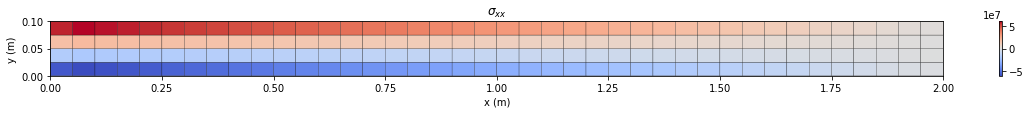

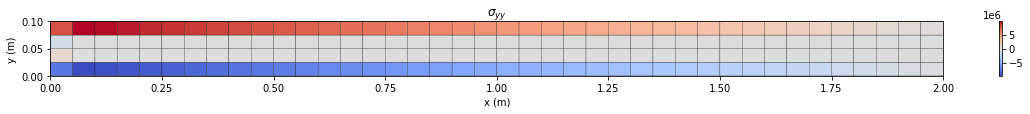

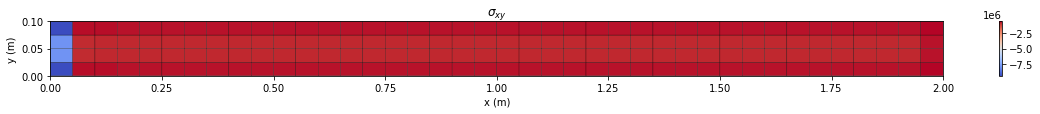

In [36]:
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.pcolor(dispx_cell, dispy_cell, np.flip(sigma_xx, 0), edgecolors = "k", cmap='coolwarm')
plt.title("$\sigma _{xx}$")
plt.colorbar()
plt.show()

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.pcolor(dispx_cell, dispy_cell, np.flip(sigma_yy, 0), edgecolors = "k", cmap='coolwarm')
plt.title("$\sigma _{yy}$")
plt.colorbar()
plt.show()

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.pcolor(dispx_cell, dispy_cell, np.flip(sigma_xy, 0), edgecolors = "k", cmap='coolwarm')
plt.title("$\sigma _{xy}$")
plt.colorbar()
plt.show()

## Post-processing of a fine mesh

Let's repeat this for solution examples from finer meshes:


In [37]:
# Initialise array to store beam tip deflections
deflection_array = np.array([y_deflection[40]])
nx_array = np.array([40])

In [38]:
class postProcessing(partialDisplacement):

    plt.rcParams["figure.figsize"] = (10, 5)
    plt.rcParams["grid.linestyle"] = "-" 
    plt.rcParams["grid.color"] =  "grey"
    plt.rcParams["grid.linewidth"] = 0.2

    def __init__(self, path, nx, ny, Lx, Ly):

        dx = Lx/nx
        dy = Ly/ny
        
        file = open(path + "/U_with_boundaries.csv")
        self.u_with_boundaries = np.loadtxt(file, delimiter=",")
        file = open(path + "/V_with_boundaries.csv")
        self.v_with_boundaries = np.loadtxt(file, delimiter=",")

        self.dudx = partialDisplacement(self.u_with_boundaries, self.v_with_boundaries, nx, ny, dx, dy).dudx
        self.dvdy = partialDisplacement(self.u_with_boundaries, self.v_with_boundaries, nx, ny, dx, dy).dvdy
        self.dvdx = partialDisplacement(self.u_with_boundaries, self.v_with_boundaries, nx, ny, dx, dy).dvdx
        self.dudy = partialDisplacement(self.u_with_boundaries, self.v_with_boundaries, nx, ny, dx, dy).dudy

        self.x_displacement_vector = np.zeros(nx+2)
        self.y_displacement_vector = np.zeros(ny+2)

        # First value is equal to 0
        self.x_displacement_vector[0] = 0
        self.y_displacement_vector[0] = 0

        # Last value is equal to Lx
        self.x_displacement_vector[nx+1] = Lx
        self.y_displacement_vector[ny+1] = Ly

        # Cell centre values
        self.x_displacement_vector[1:nx+1] = np.arange((Lx/nx)/2, Lx , Lx/nx)
        self.y_displacement_vector[1:ny+1] = np.arange((Ly/ny)/2, Ly , Ly/ny)

        dispx, dispy = np.meshgrid(self.x_displacement_vector, self.y_displacement_vector)
        
        self.dispx_cell = dispx[1:ny+1, 1:nx+1]
        self.dispy_cell = dispy[1:ny+1, 1:nx+1]


    def yDeflection(self):

        y_deflection = self.v_with_boundaries[0,:]
        plt.rcParams["axes.grid"] = True
        plt.figure(figsize = (10, 5))
        plt.plot(self.x_displacement_vector, y_deflection, label="y-deflection")
        plt.xlabel("x-direction (m)")
        plt.ylabel("y-deflection (m)")
        plt.scatter(2, -0.01456, label = "Analytical solution", color = "C1")
        plt.legend()
        plt.show()

    def epsilonGraph(self):

        color = "none"

        plt.rcParams["axes.grid"] = False
        plt.rcParams["figure.figsize"] = (Lx*10, Ly*10)

        epsilon_xx = self.dudx
        epsilon_yy = self.dvdy
        epsilon_xy = (1/2)*(self.dvdx + self.dudy)


        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.pcolor(self.dispx_cell, self.dispy_cell, np.flip(epsilon_xx, 0), edgecolors = color, cmap='coolwarm')
        plt.title("$\epsilon _{xx}$")
        plt.colorbar()
        plt.show()

        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.pcolor(self.dispx_cell, self.dispy_cell, np.flip(epsilon_yy, 0), edgecolors = color, cmap='coolwarm')
        plt.title("$\epsilon _{yy}$")
        plt.colorbar()
        plt.show()

        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.pcolor(self.dispx_cell, self.dispy_cell, np.flip(epsilon_xy, 0), edgecolors = color, cmap='coolwarm')
        plt.title("$\epsilon _{xy}$")
        plt.colorbar()
        plt.show()


    def sigmaGraph(self, mu, Lambda):

        color = "none"

        plt.rcParams["axes.grid"] = False
        plt.rcParams["figure.figsize"] = (Lx*10, Ly*10)

        sigma_xx = (2*mu + Lambda)*self.dudx + Lambda*self.dvdy
        sigma_yy = (2*mu + Lambda)*self.dvdy + Lambda*self.dudx
        sigma_xy = mu*(self.dvdx + self.dudy)

        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.pcolor(self.dispx_cell, self.dispy_cell, np.flip(sigma_xx, 0), edgecolors = color, cmap='coolwarm')
        plt.title("$\sigma _{xx}$")
        plt.colorbar()
        plt.show()

        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.pcolor(self.dispx_cell, self.dispy_cell, np.flip(sigma_yy, 0), edgecolors = color, cmap='coolwarm')
        plt.title("$\sigma _{yy}$")
        plt.colorbar()
        plt.show()

        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.pcolor(self.dispx_cell, self.dispy_cell, np.flip(sigma_xy, 0), edgecolors = color, cmap='coolwarm')
        plt.title("$\sigma _{xy}$")
        plt.colorbar()
        plt.show()


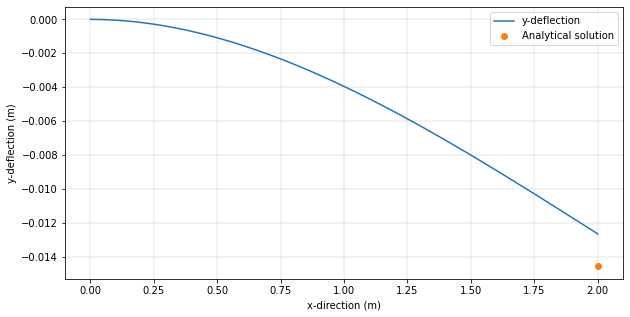

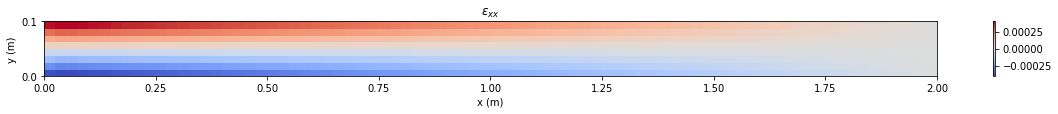

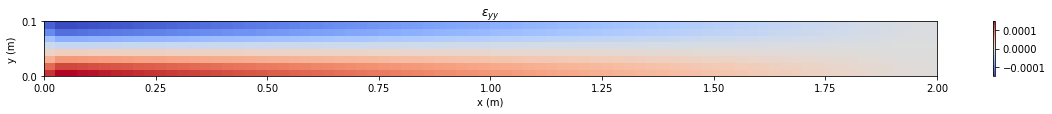

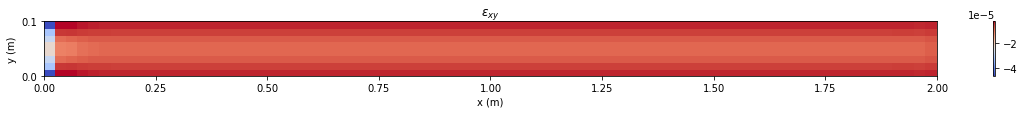

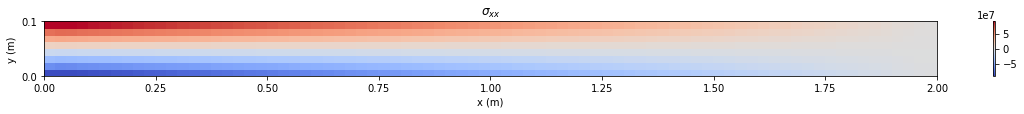

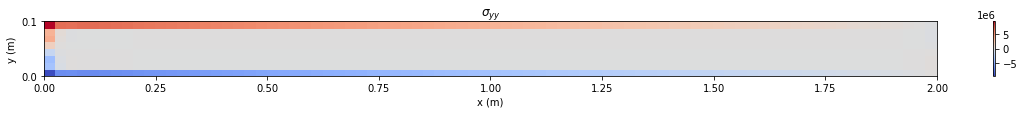

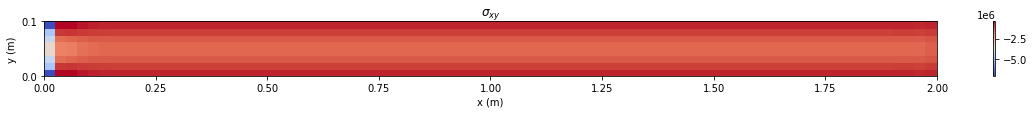

Beam tip deflection: -0.012521088130350654


In [39]:
filepath = 'Solution_examples/x_80_y_8/0'
nx, ny, Lx, Ly = 80, 8, 2, 0.1
postProcessing(filepath, nx, ny, Lx, Ly).yDeflection()
postProcessing(filepath, nx, ny, Lx, Ly).epsilonGraph()
postProcessing(filepath, nx, ny, Lx, Ly).sigmaGraph(mu, Lambda)

y_deflection = postProcessing(filepath, nx, ny, Lx, Ly).v_with_boundaries[0,nx]
deflection_array = np.append(deflection_array, [y_deflection])
nx_array = np.append(nx_array, nx)
print("Beam tip deflection: " + str(y_deflection))

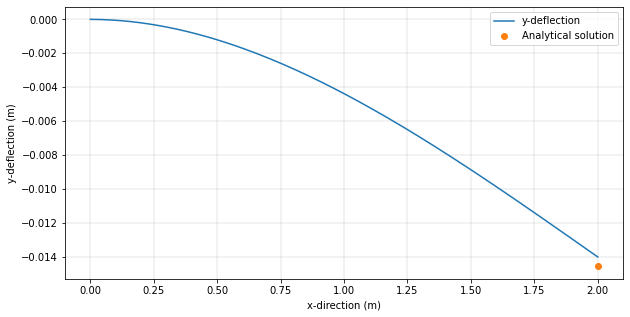

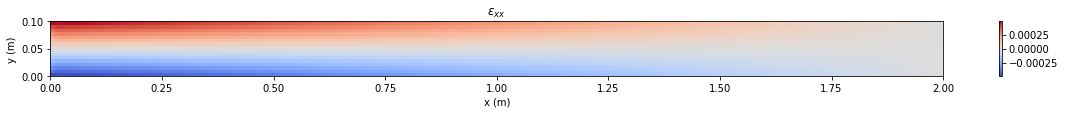

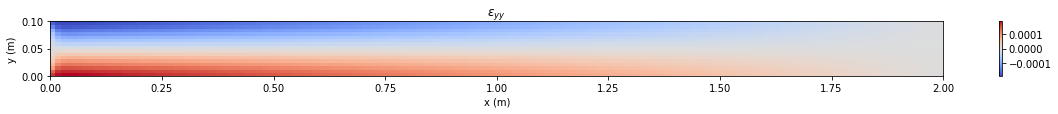

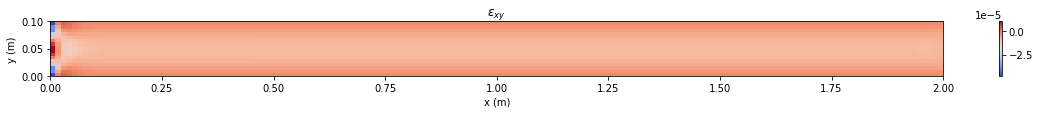

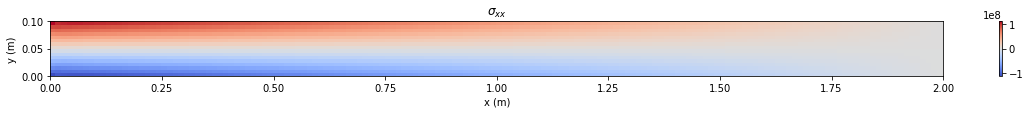

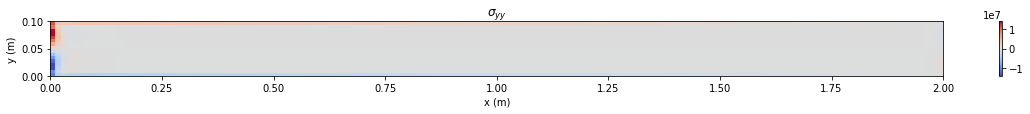

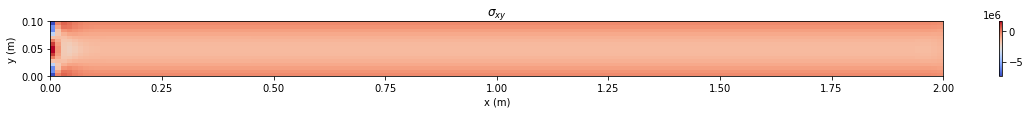

Beam tip deflection: -0.01393400866101847


In [40]:
filepath = 'Solution_examples/x_160_y_16/0'
nx, ny, Lx, Ly = 160, 16, 2, 0.1
postProcessing(filepath, nx, ny, Lx, Ly).yDeflection()
postProcessing(filepath, nx, ny, Lx, Ly).epsilonGraph()
postProcessing(filepath, nx, ny, Lx, Ly).sigmaGraph(mu, Lambda)

y_deflection = postProcessing(filepath, nx, ny, Lx, Ly).v_with_boundaries[0,nx]
deflection_array = np.append(deflection_array, [y_deflection])
nx_array = np.append(nx_array, nx)
print("Beam tip deflection: " + str(y_deflection))

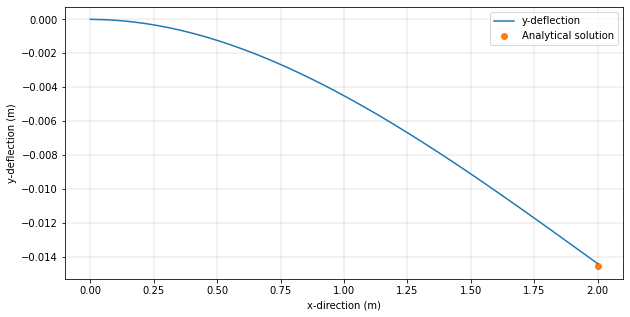

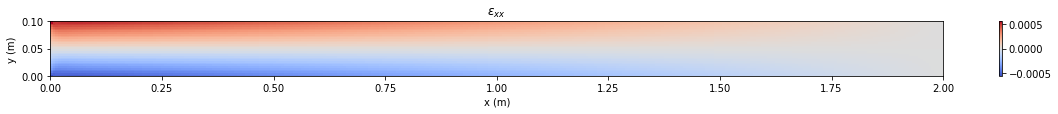

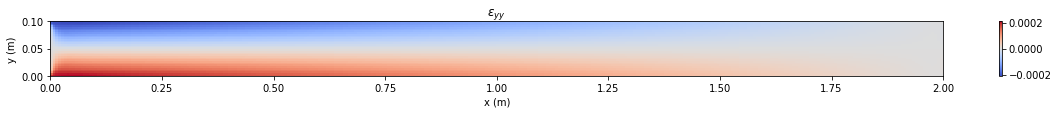

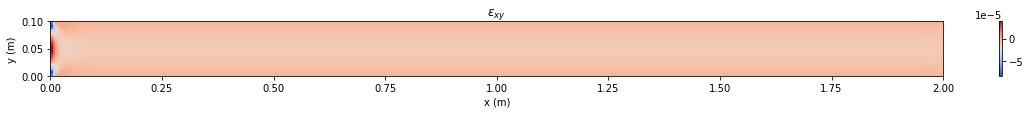

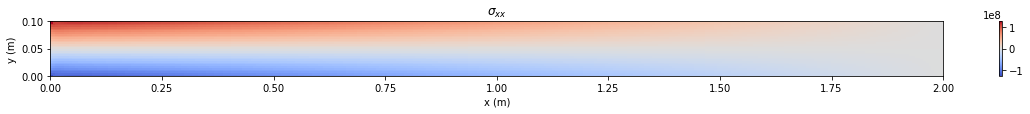

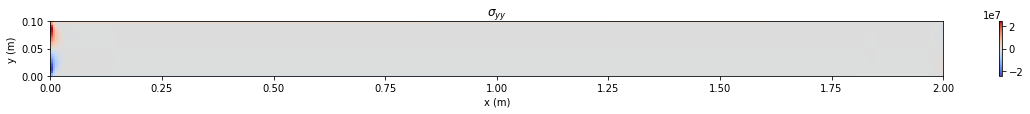

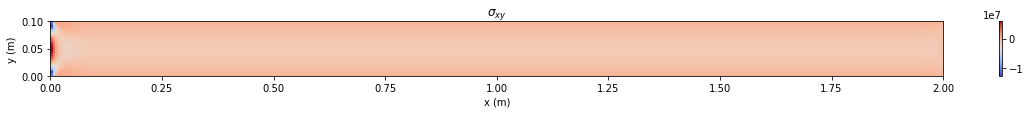

Beam tip deflection: -0.014362300159379662


In [41]:
filepath = 'Solution_examples/x_320_y_32/0'
nx, ny, Lx, Ly = 320, 32, 2, 0.1
postProcessing(filepath, nx, ny, Lx, Ly).yDeflection()
postProcessing(filepath, nx, ny, Lx, Ly).epsilonGraph()
postProcessing(filepath, nx, ny, Lx, Ly).sigmaGraph(mu, Lambda)

y_deflection = postProcessing(filepath, nx, ny, Lx, Ly).v_with_boundaries[0,nx]
deflection_array = np.append(deflection_array, [y_deflection])
nx_array = np.append(nx_array, nx)
print("Beam tip deflection: " + str(y_deflection))

## Mesh refinement study

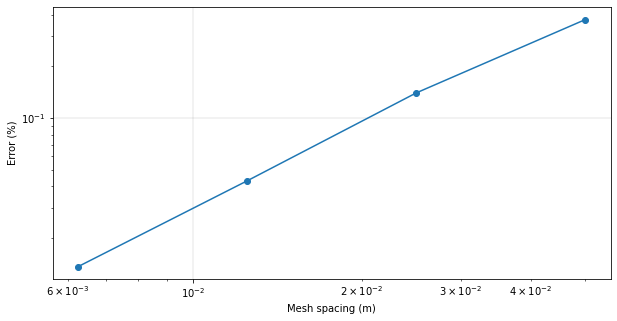

In [42]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True


mesh_spacing = Lx/nx_array
error =  (-0.01456) - deflection_array
error_percentage = error/(-0.01456)


plt.scatter(mesh_spacing, error_percentage)
plt.plot(mesh_spacing, error_percentage)

plt.xlabel("Mesh spacing (m)")
plt.ylabel("Error (%)")
plt.xscale("log")
plt.yscale("log")